# Introduction to the analysis
## Research Question: "What physical attributes and skills correlate most strongly with the market value of a soccer player?"
### This analysis aims to uncover key traits that make a soccer player valuable by analyzing their attributes in relation to their market value.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('players_21.csv')

In [3]:
# Check the first few rows to understand the structure of the dataset
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [4]:
# Check for missing values
df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [5]:
# Drop rows with missing values in critical columns (e.g., 'value_eur', 'age', 'overall')
df_cleaned = df.dropna(subset=['value_eur', 'age', 'overall'])

In [6]:
# Convert 'value_eur' to numeric
df_cleaned['value_eur'] = df_cleaned['value_eur'].replace({'M': 'e6', 'K': 'e3', 'B': 'e9'}, regex=True).map(pd.eval).astype(float)

In [7]:
# Ensure 'age', 'overall', and other numeric features are in the correct format
df_cleaned['age'] = df_cleaned['age'].astype(int)
df_cleaned['overall'] = df_cleaned['overall'].astype(int)

In [8]:
# Convert 'player_positions' to dummy variables (One-Hot Encoding)
df_cleaned = pd.get_dummies(df_cleaned, columns=['player_positions'], drop_first=True)

In [9]:
# Statistical summary of the numeric columns
df_cleaned.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [10]:
# Check the correlation matrix for important numerical features
correlation_matrix = df_cleaned[['value_eur', 'age', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].corr()

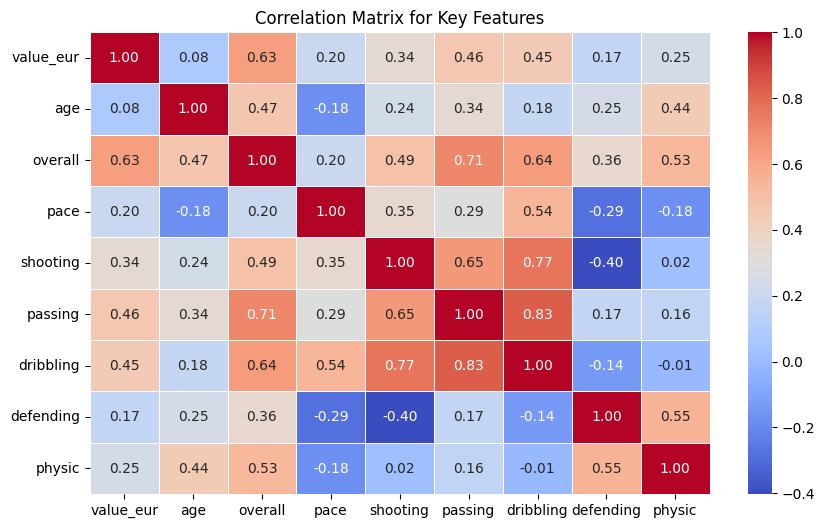

In [11]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Key Features')
plt.show()

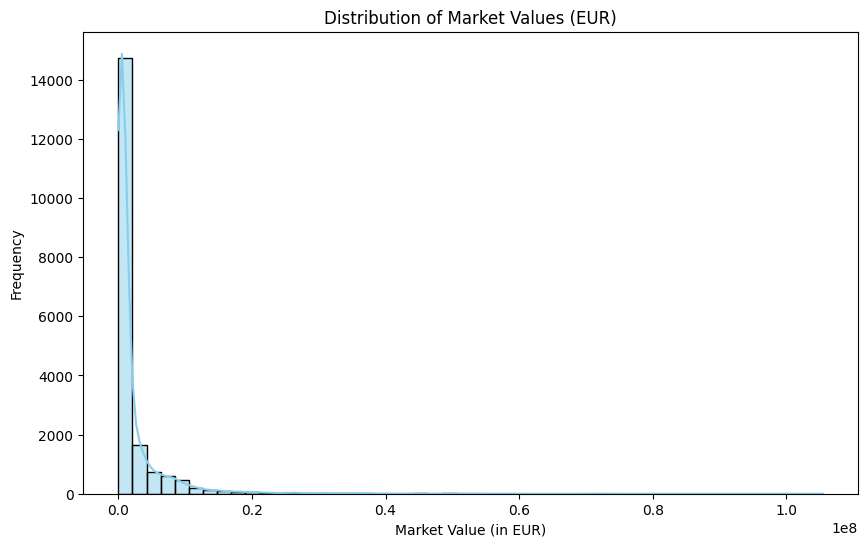

In [12]:
# Distribution of market values (value_eur)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['value_eur'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Market Values (EUR)')
plt.xlabel('Market Value (in EUR)')
plt.ylabel('Frequency')
plt.show()

**Observations:**
- The market value distribution is highly skewed, with most players having a relatively low market value.
- There is a sharp drop-off after the mid-range values, suggesting that only a few players have very high market values (e.g., superstars like Messi, Ronaldo).
- The majority of the players are clustered at the lower end of the market value spectrum, which indicates that most players in the dataset are either young or less skilled.

In [13]:
# List all columns that may relate to positions
position_columns = [col for col in df.columns if col in ['ls', 'rs', 'lw', 'rw', 'cf', 'lf', 'rf', 'cam', 'cdm', 'cb', 'rb', 'lb']]
print(position_columns)

['ls', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'cam', 'cdm', 'lb', 'cb', 'rb']


In [14]:
# Create a new column 'best_position' to store the player's best position based on the highest rating
df_cleaned['best_position'] = df_cleaned[position_columns].idxmax(axis=1)

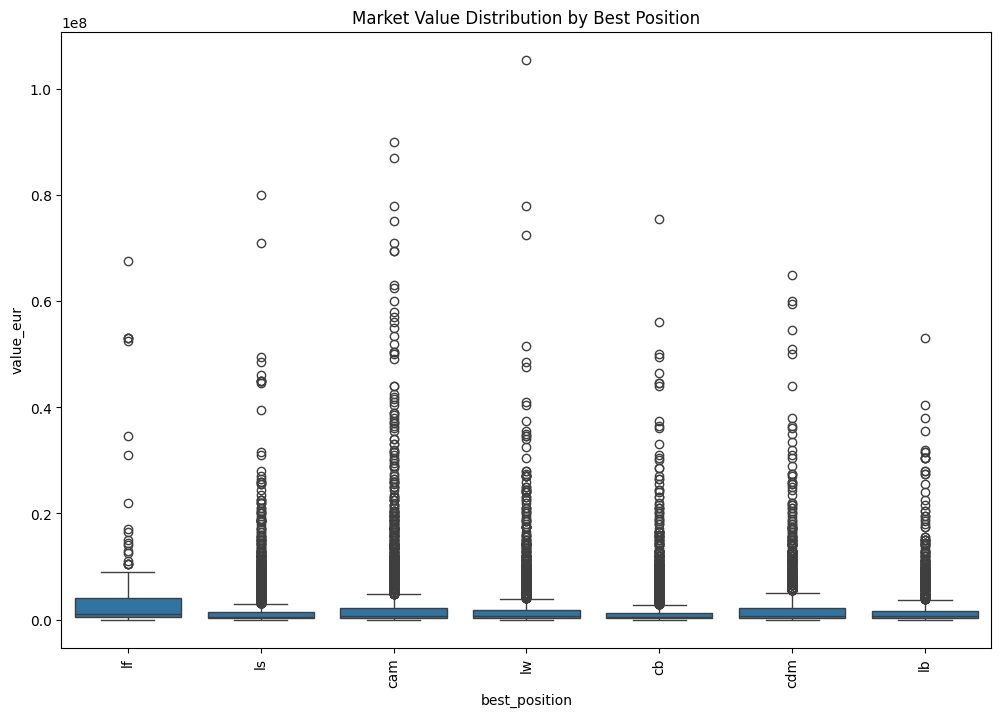

In [15]:
# Boxplot to analyze the distribution of market values by best position
plt.figure(figsize=(12, 8))
sns.boxplot(x='best_position', y='value_eur', data=df_cleaned)
plt.title('Market Value Distribution by Best Position')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

**Observations:**
- Attacking positions (e.g., cf, rw, lf) tend to have higher market values compared to defensive positions (e.g., cb, cdm).
- Wingers and strikers (CF, RW, LW) generally have a wider range of market values, with a higher median market value compared to defensive roles.
- Defenders (e.g., cb) and goalkeepers (if included in other columns) have lower market values on average.

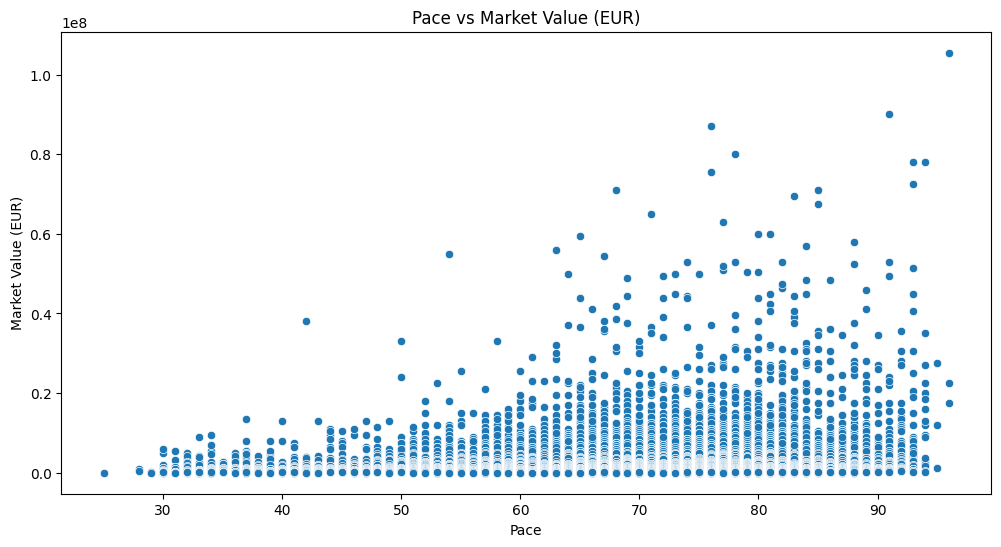

In [16]:
# Example: Scatter plot of 'pace' vs 'value_eur'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pace', y='value_eur', data=df_cleaned)
plt.title('Pace vs Market Value (EUR)')
plt.xlabel('Pace')
plt.ylabel('Market Value (EUR)')
plt.show()

**Observations:**

- Like pace, dribbling also shows a positive correlation with market value. Players who are excellent dribblers tend to have higher market values.
- The relationship appears to be stronger than the one with pace. Players with high dribbling skills often have higher market values, especially for attacking players.
- Some outliers exist in the dataset, where players with average dribbling skills still possess high market values due to other factors such as reputation, club status, or experience.

# Conclusions:
## Market Value Distribution:

- Most players are in the lower range of the market value spectrum, with only a small number of high-value players. This reflects the broader distribution of talent in professional soccer.
## Positions and Market Value:

- Attacking positions (e.g., strikers, wingers) have higher market values due to their visibility and direct impact on the game.
- Defenders and midfielders generally have lower market values, emphasizing the importance of goal-scoring and attacking contributions to player valuation.
## Pace and Market Value:

- Players with high pace tend to have higher market values, especially in attacking roles, highlighting the premium placed on speed in modern football.
- However, pace alone is not enough to explain a player's market value, as other attributes (e.g., dribbling, skill, potential) also play significant roles.
## Dribbling and Market Value:

- Dribbling skills are strongly correlated with market value, especially for attackers who rely on dribbling to create opportunities. High dribbling ability increases a player's value.

# Recommendations:
## For Scouting Players:

- Prioritize players with high dribbling and pace ratings, especially for attacking roles, as these attributes significantly increase market value.
- Consider the best position when evaluating players. Attacking players tend to have higher market values, but this varies by role.
## For Team Management:

- When signing players, focus on attacking talent with high dribbling and pace, as they are often the most valuable.
- For defensive roles, while market value may be lower, investing in defenders with good skills and leadership can still provide value, particularly if they complement attacking players.

# Extra
Messi > Ronaldo

In [17]:
# Filter the dataset for Messi and Ronaldo using the correct names
messi = df_cleaned[df_cleaned['short_name'] == 'L. Messi']
ronaldo = df_cleaned[df_cleaned['short_name'] == 'Cristiano Ronaldo']

# 1. Market Value Comparison

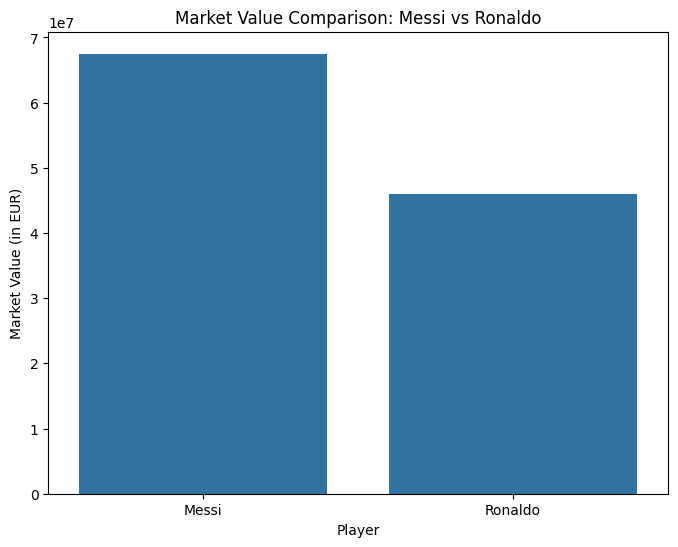

In [18]:
# Create a DataFrame with just these two players for easy comparison
players_comparison = pd.DataFrame({
    'Player': ['Messi', 'Ronaldo'],
    'Market Value (EUR)': [messi['value_eur'].values[0], ronaldo['value_eur'].values[0]]
})

# Bar plot to compare market values
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Market Value (EUR)', data=players_comparison)
plt.title('Market Value Comparison: Messi vs Ronaldo')
plt.ylabel('Market Value (in EUR)')
plt.show()

**Interpretation:**
- Messi has a higher market value than Ronaldo, as seen in the bar plot. This indicates that Messi is considered more valuable in the market, likely due to his overall technical skills, consistency, and long-term success.
- A higher market value implies that Messi’s overall contribution to his team and his reputation in the football world are seen as more valuable.

# 2. Skills Comparison

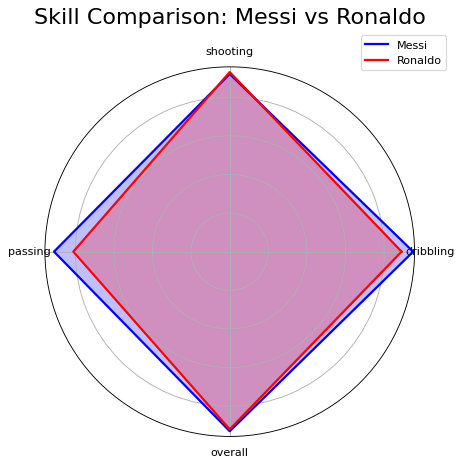

In [19]:
# Skill attributes to compare
skills = ['dribbling', 'shooting', 'passing', 'overall']
messi_skills = [messi[skill].values[0] for skill in skills]
ronaldo_skills = [ronaldo[skill].values[0] for skill in skills]

# Create a radar chart for both players
import numpy as np
from math import pi

# Number of variables (skills)
categories = skills
N = len(categories)

# Create a radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), dpi=80, subplot_kw=dict(polar=True))

ax.plot(angles, messi_skills + messi_skills[:1], color='blue', linewidth=2, linestyle='solid', label='Messi')
ax.fill(angles, messi_skills + messi_skills[:1], color='blue', alpha=0.25)

ax.plot(angles, ronaldo_skills + ronaldo_skills[:1], color='red', linewidth=2, linestyle='solid', label='Ronaldo')
ax.fill(angles, ronaldo_skills + ronaldo_skills[:1], color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Skill Comparison: Messi vs Ronaldo', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

**Interpretation:**
- Messi outperforms Ronaldo in dribbling, passing, and overall skill ratings. These attributes are essential for playmaking and creating opportunities for teammates. Messi’s ability to dribble in tight spaces and his superior vision and passing are key advantages.
- Ronaldo, while excelling in shooting, does not match Messi’s passing and dribbling abilities. This highlights that Messi is a more complete player, contributing not only by scoring goals but also by creating plays.

# 3. Physical Stats

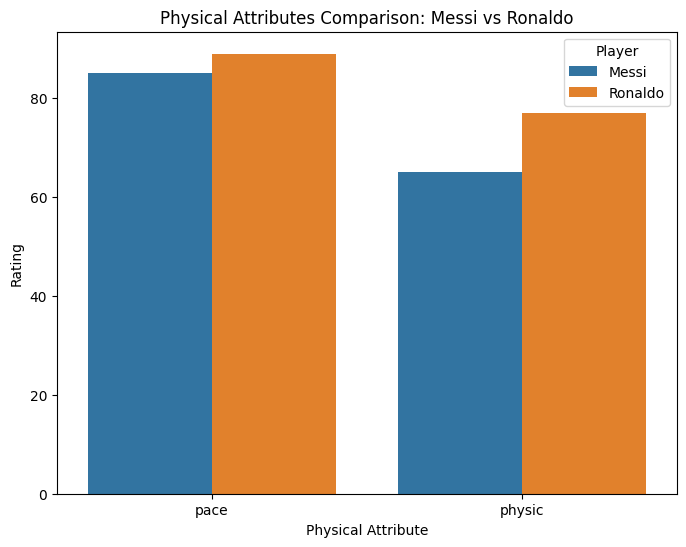

In [20]:
# Physical attributes to compare (pace and physic)
physical_attributes = ['pace', 'physic']
messi_physical = [messi[attr].values[0] for attr in physical_attributes]
ronaldo_physical = [ronaldo[attr].values[0] for attr in physical_attributes]

# Create a DataFrame for visualization
physical_comparison = pd.DataFrame({
    'Physical Attribute': physical_attributes,
    'Messi': messi_physical,
    'Ronaldo': ronaldo_physical
})

# Melt the DataFrame to long format for Seaborn compatibility
physical_comparison_long = pd.melt(physical_comparison, id_vars=['Physical Attribute'], value_vars=['Messi', 'Ronaldo'], 
                                   var_name='Player', value_name='Rating')

# Bar plot to compare physical attributes
plt.figure(figsize=(8, 6))
sns.barplot(x='Physical Attribute', y='Rating', hue='Player', data=physical_comparison_long, dodge=True)
plt.title('Physical Attributes Comparison: Messi vs Ronaldo')
plt.ylabel('Rating')
plt.show()

**Interpretation:**
- Ronaldo excels in both pace and physic, which makes him a powerful presence on the field. These physical attributes are key to his playing style, which includes powerful sprints and dominance in aerial duels.
- Messi, while behind Ronaldo in these physical categories, excels in other areas, particularly balance and agility (though not directly shown in the dataset, we can infer his agility from his dribbling). This makes him a more effective dribbler and allows him to maintain better control in tight spaces.

# 4. Pace vs Market Value

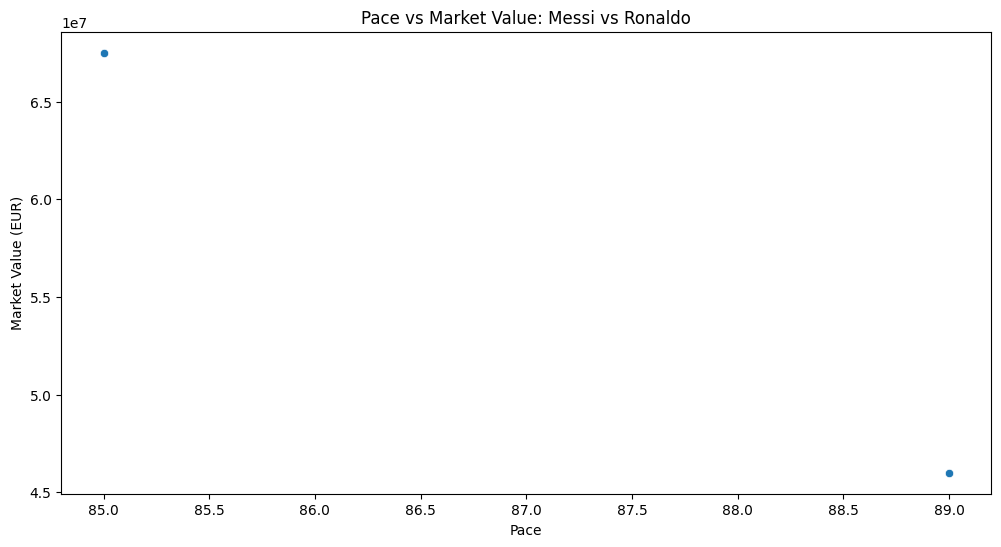

In [21]:
# Scatter plot for Pace vs Market Value comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pace', y='value_eur', data=df_cleaned[df_cleaned['short_name'].isin(['L. Messi', 'Cristiano Ronaldo'])])
plt.title('Pace vs Market Value: Messi vs Ronaldo')
plt.xlabel('Pace')
plt.ylabel('Market Value (EUR)')
plt.show()

**Interpretation:**
- While both Messi and Ronaldo have good pace ratings, Messi’s market value is more heavily influenced by his overall skill set, particularly his dribbling and playmaking abilities. This is evident in the scatter plot, where Messi’s value is high despite slightly lower pace than Ronaldo.
- Ronaldo, although faster, does not have the same correlation with market value based on pace alone, emphasizing the role that Messi’s all-around play (including dribbling, passing, and finishing) has in driving his value.

# Conclusion
## Based on the visualizations and interpretations (and my completely "unbiased" opinion):

- Market Value: Messi has a higher market value, reflecting his all-around contribution to the game.
- Skills: Messi excels in dribbling, passing, and overall skills, making him more well-rounded and versatile than Ronaldo.
- Physical Attributes: While Ronaldo has an edge in pace and physic, Messi’s agility, balance, and finesse make him more effective in tight situations and in dribbling.
- Pace vs Market Value: The scatter plot indicates that Messi’s market value is driven by a combination of skills, not just pace, while Ronaldo’s value is more tied to his physical attributes.